In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


In [2]:
airline = pd.read_excel('/content/EastWestAirlines.xlsx',sheet_name="data")

In [3]:
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
airline.shape

(3999, 12)

In [6]:
airline.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
airline.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


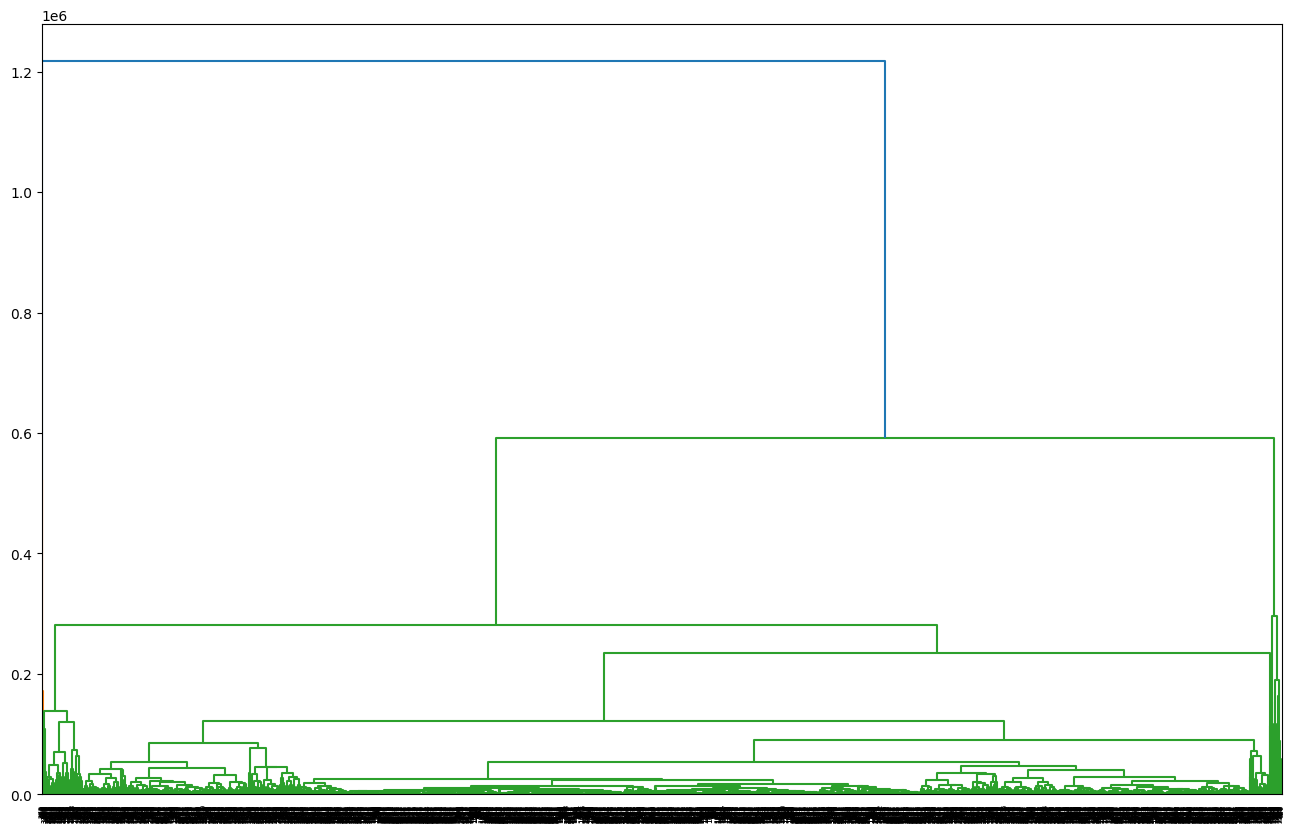

In [8]:
# create dendrogram
plt.figure(figsize = (16, 10));
dendrogram = sch.dendrogram(sch.linkage(airline,method='average'))

In [9]:
# Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average' )

In [10]:
# save clusters for chart
y_hc = hc.fit_predict(airline)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [11]:
airline1 = pd.concat([airline,Clusters], axis=1)

In [12]:
airline1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [13]:
airline1.sort_values("Clusters")

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
2658,2678,27438,0,1,1,1,2528,6,2528,6,2490,0,0
2659,2679,14748,0,1,1,1,2210,7,0,0,2497,1,0
2660,2680,49514,0,1,1,1,4500,22,0,0,2569,0,0
2661,2681,7457,0,1,1,1,17131,5,0,0,2496,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,516,889456,1024,5,1,1,98959,29,850,4,6652,1,4
117,120,969559,0,1,1,1,2500,3,1000,2,7718,1,4
1188,1200,837979,0,1,1,1,18372,15,1450,4,5373,1,4
3772,3795,822321,0,5,1,1,138334,26,600,2,3288,1,4


In [14]:
kmeans = KMeans(n_clusters=14,random_state=0)
kmeans.fit(airline)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=14, random_state=0)

In [15]:
kmeans.inertia_

1834070337748.032

In [16]:
wcss = []
for i in range(1, 19):
  kmeans = KMeans (n_clusters=i,random_state=0)
  kmeans.fit(airline)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [17]:
wcss

[42967206847420.62,
 20828852094270.258,
 11794254039243.787,
 7554668286111.583,
 5775051202470.368,
 4546507928780.678,
 3702589069199.205,
 3276988157640.797,
 2902566130528.8184,
 2626868222415.1846,
 2388857476451.359,
 2145927982985.3093,
 1970924985403.4434,
 1834070337748.032,
 1704025192843.401,
 1600642706952.2222,
 1471387695494.5984,
 1403671270869.3877]

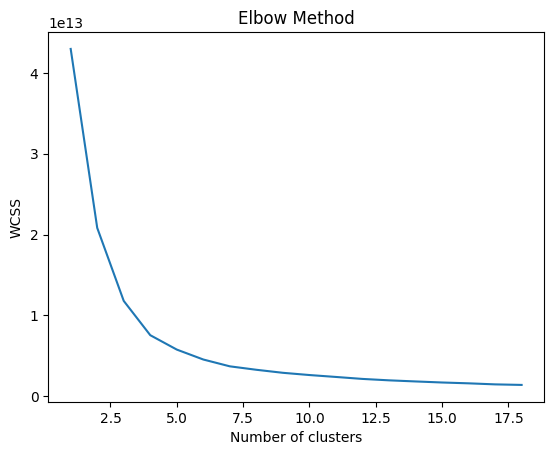

In [18]:
plt.plot(range(1, 19),wcss)
plt.title("Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
# Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(7,random_state=0)
clusters_new.fit(airline)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=0)

In [20]:
clusters_new.labels_

array([3, 3, 3, ..., 6, 6, 3], dtype=int32)

In [21]:
# Converting array to datafrme
df =  pd.DataFrame(clusters_new.labels_, columns = ['Cluster ID'])

In [22]:
airline2 = pd.concat([airline,df], axis=1)
airline2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster ID
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,6
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,6
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,6


In [23]:
airline3=airline2.drop(['ID#'], axis=1)

In [24]:
airline3.groupby('Cluster ID').agg(['mean']).reset_index()

,Cluster ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.275126e+05,230.817708,3.006944,1.013889,1.041667,32397.265625,16.447917,783.171875,2.295139,4746.440972,0.456597
1,1,7.283600e+05,258.636364,3.500000,1.000000,1.136364,62470.818182,22.000000,1600.909091,5.727273,6189.681818,0.863636
2,2,3.948273e+05,465.400000,3.188235,1.035294,1.000000,48679.482353,19.176471,1522.247059,4.682353,5859.458824,0.717647
3,3,1.980550e+04,96.539196,1.372362,1.017588,1.000000,6018.991960,7.609045,214.708040,0.673869,3609.872864,0.286432
4,4,2.210648e+05,303.074510,2.917647,1.000000,1.000000,34492.215686,18.105882,1094.184314,3.137255,5107.835294,0.505882
5,5,1.288916e+06,1528.000000,3.000000,1.000000,1.000000,39098.000000,24.600000,2754.600000,11.400000,7821.600000,0.800000
6,6,6.479469e+04,113.580675,2.500938,1.011257,1.020638,21970.452158,14.001876,472.782364,1.359287,4293.329268,0.408068


In [25]:
airline3['Cluster ID'].value_counts()

3    1990
6    1066
0     576
4     255
2      85
1      22
5       5
Name: Cluster ID, dtype: int64

In [26]:
airline.head(4)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0


In [27]:
a=airline.values

In [28]:
a

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]])

In [29]:
stscaler = StandardScaler().fit(a)
X1 = stscaler.transform(a)

In [30]:
dbscan = DBSCAN(eps=0.82, min_samples=6)
dbscan.fit(X1)

DBSCAN(eps=0.82, min_samples=6)

In [31]:
# Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [32]:
cl=pd.DataFrame(dbscan.labels_,columns=['Cluster'])

In [33]:
airline4 = pd.concat([airline,cl],axis=1)
airline4

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [34]:
airline4['Cluster'].value_counts()

 0    2182
 1     903
-1     879
 3      16
 4       7
 5       7
 2       5
Name: Cluster, dtype: int64

# **Crime Dataset**

In [35]:
 df = pd.read_csv('/content/crime_data.csv')

In [36]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [37]:
crime=df.rename({'Unnamed: 0':'States'},axis=1)

In [38]:
crime.tail()

,States,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [39]:
#crime.States.value_counts()

In [40]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [41]:
crime.isna().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [42]:
n = MinMaxScaler()
data= n.fit_transform(crime.iloc[:,1:].to_numpy())
crime = pd.DataFrame(data, columns = crime.columns[1:])
crime.head(4)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245


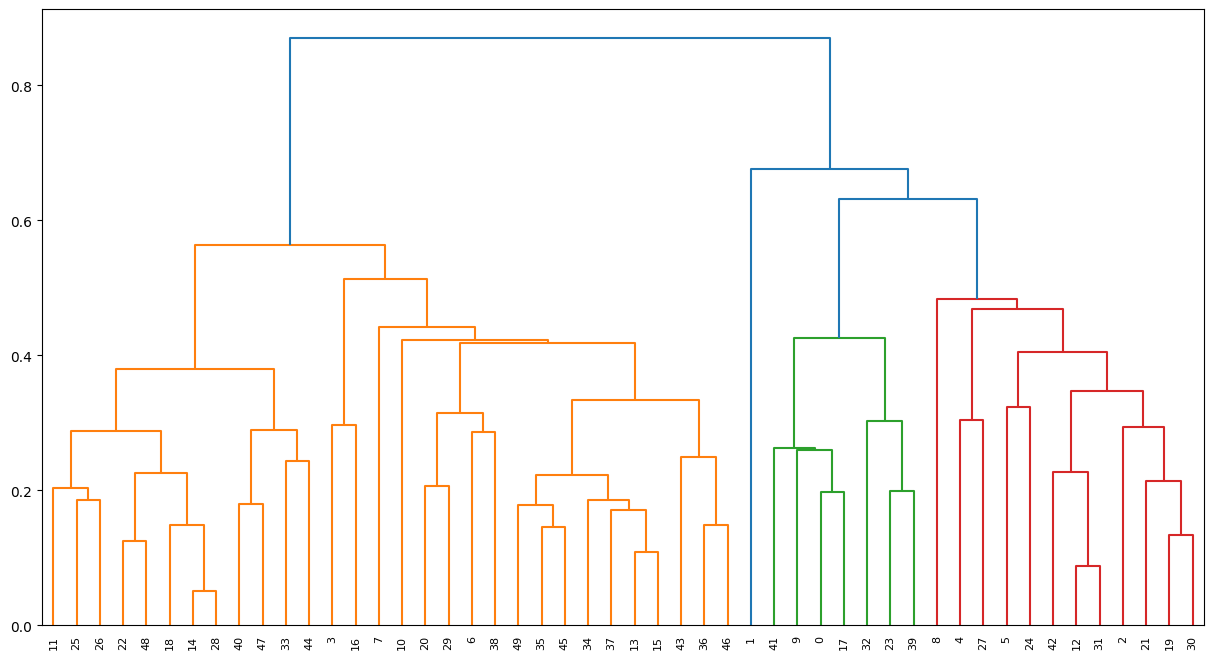

In [43]:
# Create Dendrogram
fig = plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(crime, method='average'))

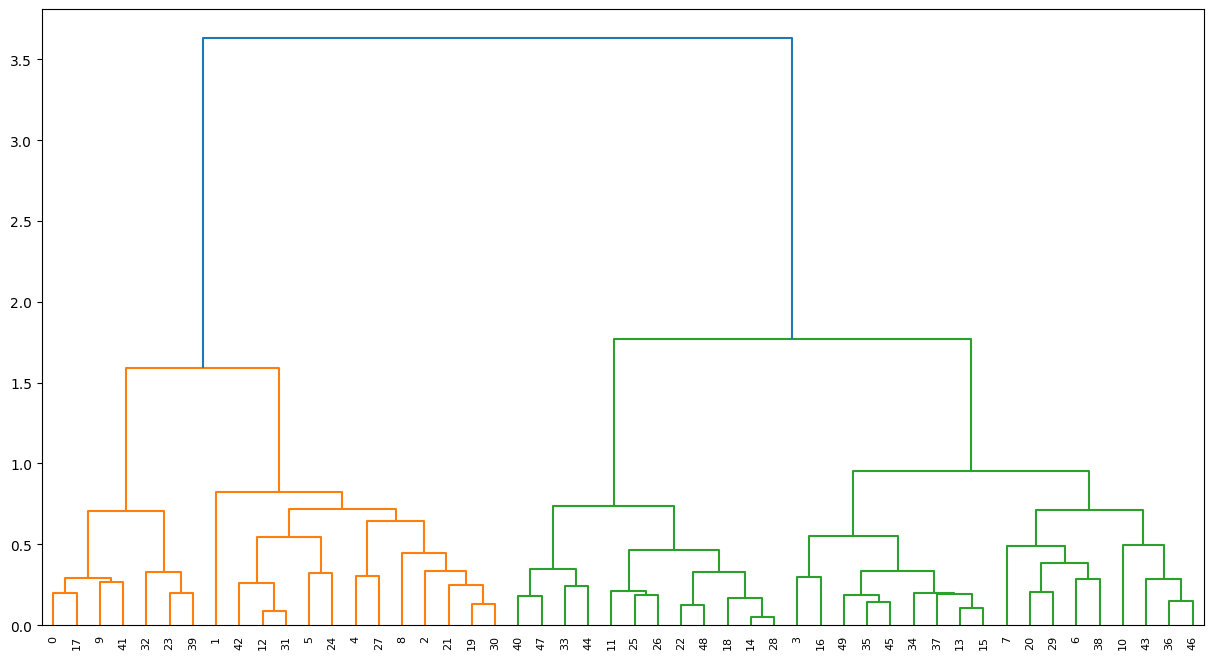

In [44]:
# Create dendrogram
fig = plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(crime, method='ward'))

In [45]:
# create clusters
hc1 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [49]:
# save clusters for chart
y2 = hc1.fit_predict(crime)
cc = pd.DataFrame(y2,columns=['Clusters'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [47]:
cc.head(6)

,Clusters
0,3
1,2
2,1
3,0
4,1
5,1


In [51]:
crime2 = pd.concat([crime,cc],axis=1)
crime2.head(7)

,Murder,Assault,UrbanPop,Rape,Clusters
0,0.746988,0.654110,0.440678,0.359173,3
1,0.554217,0.746575,0.271186,0.961240,2
2,0.439759,0.852740,0.813559,0.612403,1
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,1
5,0.427711,0.544521,0.779661,0.811370,1
6,0.150602,0.222603,0.762712,0.098191,0


In [52]:
crime2.sort_values('Clusters').reset_index()

,index,Murder,Assault,UrbanPop,Rape,Clusters
0,49,0.361446,0.397260,0.474576,0.214470,0
1,28,0.078313,0.041096,0.406780,0.056848,0
2,34,0.391566,0.256849,0.728814,0.364341,0
3,26,0.210843,0.195205,0.508475,0.237726,0
4,25,0.313253,0.219178,0.355932,0.235142,0
5,48,0.108434,0.027397,0.576271,0.090439,0
6,35,0.349398,0.363014,0.610169,0.328165,0
7,22,0.114458,0.092466,0.576271,0.196382,0
8,36,0.246988,0.390411,0.593220,0.568475,0
9,20,0.216867,0.356164,0.898305,0.232558,0


In [53]:
crime2['Clusters'].value_counts()

0    30
1    12
3     7
2     1
Name: Clusters, dtype: int64

In [54]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(crime)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [55]:
kmeans.inertia_

3.6834561535859134

In [56]:
wcss = []
for i in range(1,8):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(crime)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [57]:
wcss

[13.184122550256447,
 6.596893867946196,
 5.010878493006417,
 3.6834561535859134,
 3.22507225604479,
 2.8520398885211113,
 2.5848664114310447]

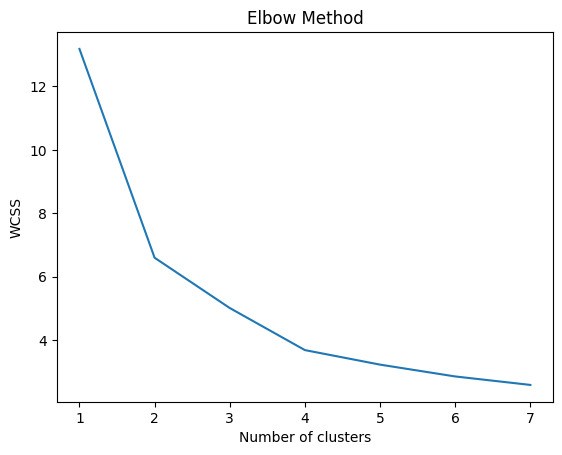

In [58]:
plt.plot(range(1,8),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [59]:
# Build Cluster algorithm
cc2 = KMeans(4, random_state=8)
cc2.fit(crime)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=8)

In [60]:
cc2.labels_

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 0, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [61]:
#Converting arry to dataframe
df2 = pd.DataFrame(cc2.labels_, columns =['clusters'])

In [63]:
crime3 = pd.concat([crime,df2], axis=1)
crime3.head(4)

,Murder,Assault,UrbanPop,Rape,clusters
0,0.746988,0.654110,0.440678,0.359173,1
1,0.554217,0.746575,0.271186,0.961240,3
2,0.439759,0.852740,0.813559,0.612403,3
3,0.481928,0.496575,0.305085,0.315245,1


In [64]:
crime3['clusters'].value_counts()

0    17
2    13
3    12
1     8
Name: clusters, dtype: int64

In [66]:
crime3.groupby('clusters').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
clusters,,,,
0,0.304394,0.329371,0.705882,0.310990
1,0.791416,0.680223,0.368644,0.364664
2,0.168675,0.114858,0.340287,0.126019
3,0.612450,0.750000,0.754237,0.679802


In [70]:
array = crime.values

In [71]:
stscaler = StandardScaler().fit(array)
X2 = stscaler.transform(array)

In [72]:
X2

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [73]:
dbscan2 = DBSCAN(eps=0.98, min_samples=3)
dbscan2.fit(X2)

DBSCAN(eps=0.98, min_samples=3)

In [74]:
# Noisy samples are given the label -1
dbscan2.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0, -1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1, -1,  1,  1,  1,  1,  1])

In [75]:
c2 = pd.DataFrame(dbscan2.labels_,columns=['Cluster ID'])
c2.value_counts()

Cluster ID
 1            26
-1            12
 0             6
 2             3
 3             3
dtype: int64

In [76]:
crime4 = pd.concat([crime,c2],axis=1)
crime4

,Murder,Assault,UrbanPop,Rape,Cluster ID
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,-1
2,0.439759,0.852740,0.813559,0.612403,-1
3,0.481928,0.496575,0.305085,0.315245,-1
4,0.493976,0.791096,1.000000,0.860465,-1
5,0.427711,0.544521,0.779661,0.811370,-1
6,0.150602,0.222603,0.762712,0.098191,1
7,0.307229,0.660959,0.677966,0.219638,-1
8,0.879518,0.993151,0.813559,0.635659,-1
9,1.000000,0.568493,0.474576,0.478036,0


In [ ]:
# Drop irrelevant columns for clustering
X = df.drop(['ID#', 'Award?'], axis=1)


In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Hierarchical Clustering
plt.figure(figsize=(12, 5))
plt.title("Dendrogram for Hierarchical Clustering")
dendrogram = shc.dendrogram(shc.linkage(X_scaled, method='ward'))
plt.show()

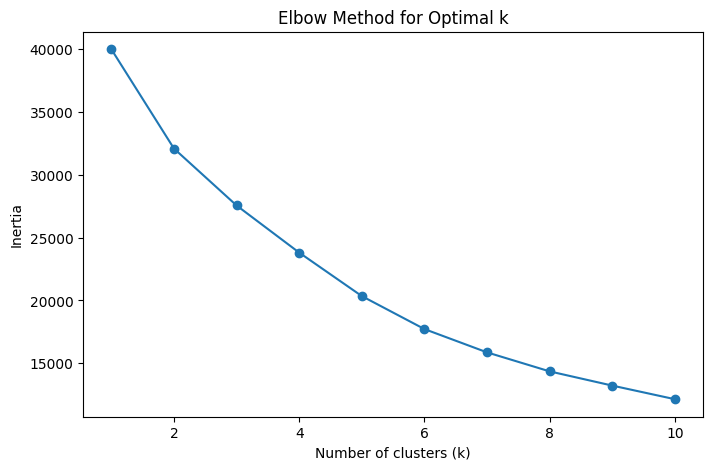

In [ ]:
# Choose the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [ ]:
# K-means clustering with the chosen number of clusters
k = 3  # Replace with the chosen number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [ ]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [ ]:
# Evaluate the quality of clustering using silhouette score
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)


In [ ]:
print(f"K-means Silhouette Score: {kmeans_silhouette}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

K-means Silhouette Score: 0.330411996315242
DBSCAN Silhouette Score: 0.5767147191313959


In [ ]:
# Add the cluster labels to the original DataFrame
df['KMeans_Cluster'] = kmeans_labels
df['DBSCAN_Cluster'] = dbscan_labels
